# 1. Introdução

Neste caderno estarão feitas as pesquisas para:
- Cálculo das médias dos dias de chuva no conjunto de dados climáticos
- Tratamento dos dados
- Ideias gerais

# 2. Passo inicial
Abaixo iremos abrir os arquivos e buscar realizar os cálculos (os arquivos foram salvos em um csv anteriormente para facilitar o trabalho). 

In [45]:
import pandas as pd

df_clima = pd.read_csv("/home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/unified/dados_climate.csv")

KeyboardInterrupt: 

In [ ]:
df_clima.columns

Index(['index', 'Data', 'Hora', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)', 'region', 'state', 'station',
       'station_code', 'latitude', 'longitude', 'height'],
      dtype='object')

In [ ]:
df_firewatch = pd.read_csv("/home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/unified/dados_filtrados.csv")

In [ ]:
df_firewatch.columns

Index(['data', 'municipio', 'estado', 'bioma', 'avg_numero_dias_sem_chuva',
       'avg_precipitacao', 'avg_risco_fogo', 'avg_frp'],
      dtype='object')

## 3. Removendo os valores do climate data
Para conseguirmos mesclar os dados, torna-se útil eliminar as colunas qur não tem nada a ver com o firewatch, para termos dados compatíveis.
Abaixo iremos remover as colunas:

In [ ]:
colunas_remover = [
    # Pressão atmosférica
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
    
    # Radiação global
    'RADIACAO GLOBAL (Kj/m²)',
    
    # Temperatura do ponto de orvalho
    'TEMPERATURA DO PONTO DE ORVALHO (°C)',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
    
    # Umidade relativa
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    
    # Vento
    'VENTO, DIREÇÃO HORARIA (gr) (° (gr))',
    'VENTO, RAJADA MAXIMA (m/s)',
    'VENTO, VELOCIDADE HORARIA (m/s)',

    # Temperaturas
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
    
    # Localização não usada agora
    'latitude',
    'longitude',
    'height'
]


df_climate_simplificado = df_clima.drop(columns=colunas_remover)

print(df_climate_simplificado.count())


index                               11427120
Data                                11427120
Hora                                11427120
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)    11427120
region                              11427120
state                               11427120
station                             11427120
station_code                        11427120
dtype: int64


## 3. Escolhendo apenas uma cidade para realizar os testes de cálculos

Como o conjunto de dados climáticos é gigantesco, torna-se útil realizar os testes dos cálculos em apenas uma cidade antes de testar para todas as outras, visando a eficiência do tratamento de dados.

In [ ]:
# Contar registros por cidade
registros_por_cidade = df_climate_simplificado.groupby("station").size().reset_index(name="n_registros")

# Ordenar do maior para o menor
registros_por_cidade = registros_por_cidade.sort_values(by="n_registros", ascending=False)

print(registros_por_cidade.head(10))  # top 10 cidades


                    station  n_registros
18                 BRASILIA       183936
70                MORRINHOS       174744
47                  GOIANIA       174648
114             TRES LAGOAS       172320
82               PONTA PORA       172224
26             CAMPO GRANDE       172152
40                   CUIABA       161256
113        TANGARA DA SERRA       161184
27   CAMPO NOVO DOS PARECIS       161136
112                 SORRISO       161064


Como sorriso é uma cidade que aparece em ambos os datasets, vou escolher ela para analisar preliminarmente

In [ ]:
# Escolher a cidade (nome exato da coluna 'station')
cidade_escolhida = "SORRISO"

# Filtrar apenas registros dessa cidade
df_cidade = df_climate_simplificado[df_climate_simplificado['station'] == cidade_escolhida].copy()

# Visualizar as primeiras linhas
print(df_cidade.head())
print(f"\nTotal de registros para {cidade_escolhida}: {len(df_climate_simplificado)}")


         index        Data   Hora  PRECIPITAÇÃO TOTAL, HORÁRIO (mm) region  \
205260  254237  2017-01-01  00:00                               0.0     CO   
205261  254238  2017-01-01  01:00                               0.0     CO   
205262  254239  2017-01-01  02:00                               0.0     CO   
205263  254240  2017-01-01  03:00                               0.0     CO   
205264  254241  2017-01-01  04:00                               0.0     CO   

       state  station station_code  
205260    MT  SORRISO         A904  
205261    MT  SORRISO         A904  
205262    MT  SORRISO         A904  
205263    MT  SORRISO         A904  
205264    MT  SORRISO         A904  

Total de registros para SORRISO: 11427120


### 4. Análise Climática da Cidade de Paranoá

Após isolar os dados referentes à cidade de **Paranoá (COOPA-DF)**, com um total de **37.056 registros**, realizaremos agora o cálculo da **média de precipitação**.

A metodologia será aplicada da seguinte forma:

1. **Conversão de Datas**  
   - A coluna `Data` será convertida para o formato `datetime` para permitir operações temporais.

2. **Agregação por Dia**  
   - As medições horárias serão somadas, obtendo-se a **precipitação total diária**.

3. **Cálculo da Média**  
   - Será calculada a **média diária de precipitação** ao longo do período analisado.

4. **Identificação de Dias sem Chuva**  
   - Contaremos a quantidade de dias em que a precipitação foi igual a zero.

Com esses cálculos, poderemos avaliar o regime pluviométrico local e sua influência nos modelos preditivos de incêndios.


In [ ]:
import pandas as pd

# Converter coluna Data para datetime
df_cidade["Data"] = pd.to_datetime(df_cidade["Data"], errors="coerce")

# Garantir que não tem valores inválidos
df_cidade = df_cidade.dropna(subset=["Data", "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"])

# Remover negativos
df_cidade = df_cidade[df_cidade["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"] >= 0]

# Agrupar por dia (precipitação diária)
precipitacao_diaria = df_cidade.groupby(df_cidade["Data"].dt.date)["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].sum()

# Converter index para datetime
precipitacao_diaria.index = pd.to_datetime(precipitacao_diaria.index)

# Agrupar por mês desde 1990
precipitacao_mensal = precipitacao_diaria.resample("M").sum()

# Calcular média geral mensal
media_geral = precipitacao_mensal.mean()
# Média de precipitação diária
media_precipitacao = precipitacao_diaria.mean()

# Contar dias sem chuva
dias_sem_chuva = (precipitacao_diaria == 0).sum()

print(f"Média de precipitação diária: {media_precipitacao:.2f} mm")
print(f"Dias sem chuva: {dias_sem_chuva}")


Média de precipitação diária: 4.29 mm
Dias sem chuva: 3274


/tmp/ipykernel_5553/3034555256.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  precipitacao_mensal = precipitacao_diaria.resample("M").sum()


### 4.1 Verificando através de gráficos

Vamos analisar através dos gráficos os resultados obtidos.

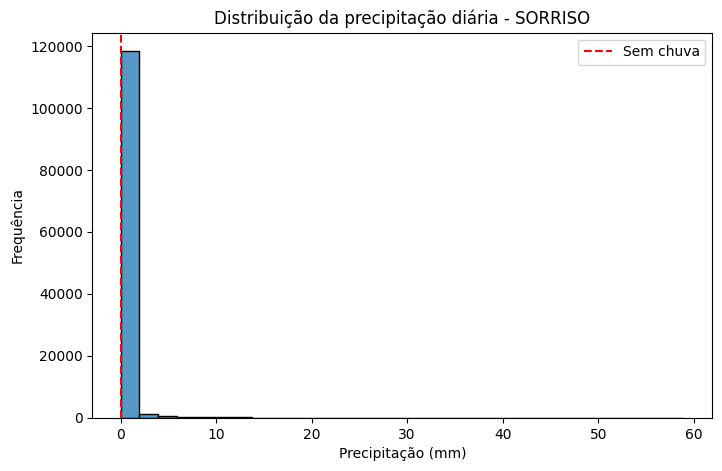

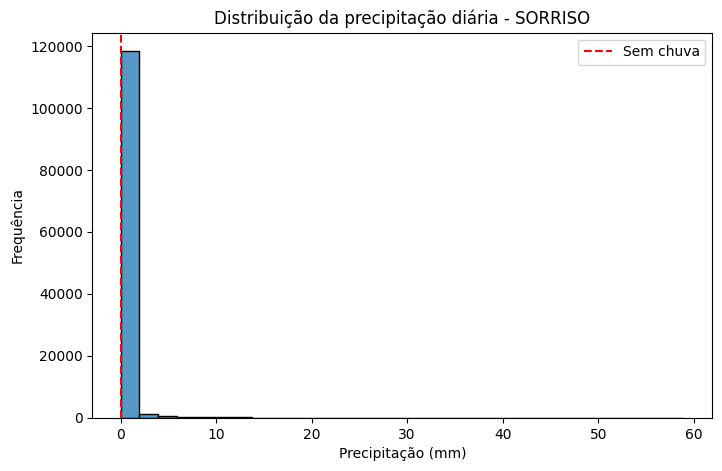

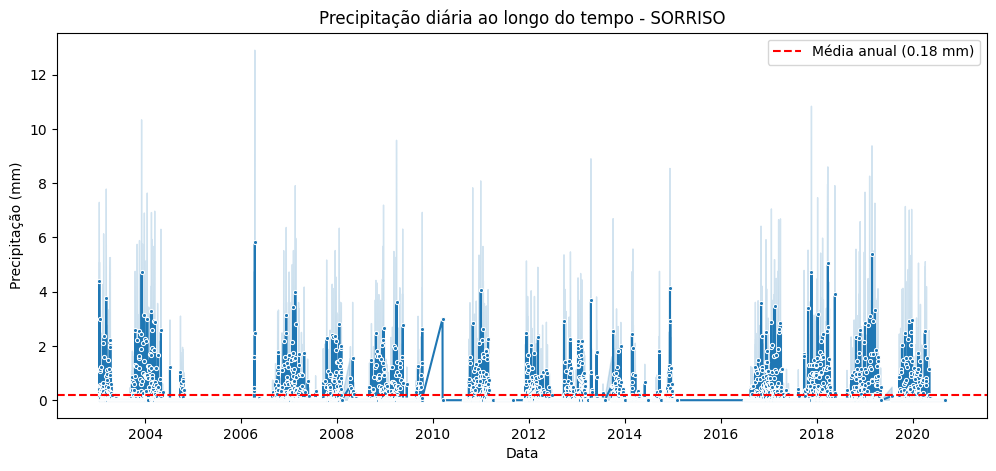

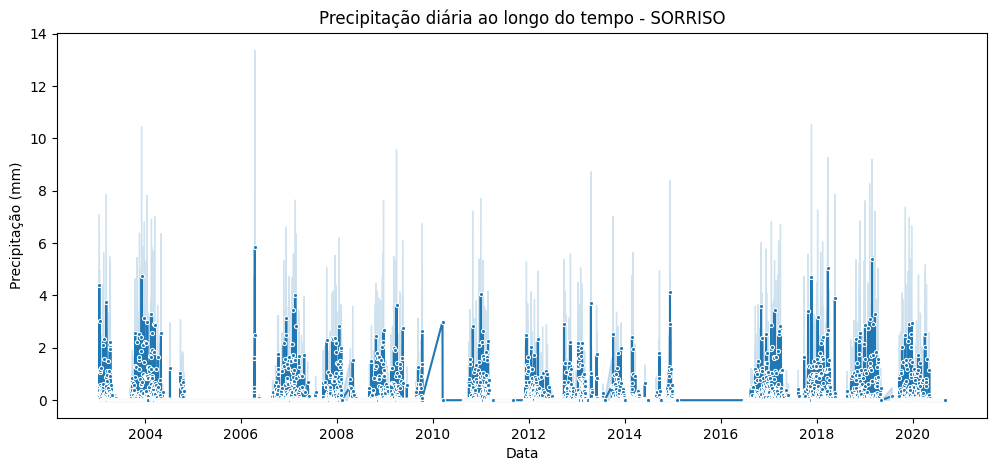

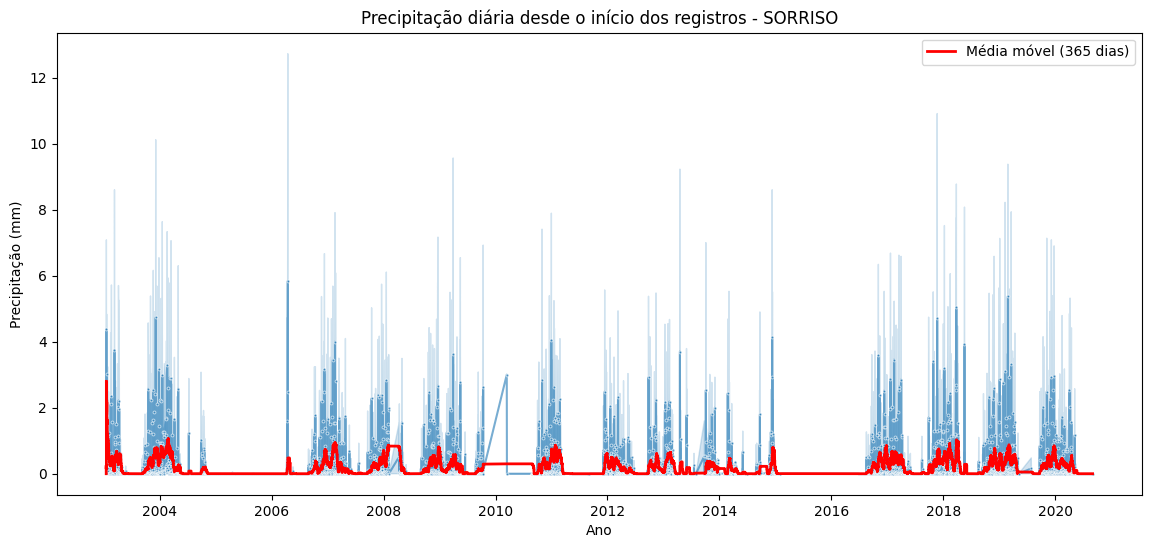

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico 1 - Histograma
plt.figure(figsize=(8, 5))
sns.histplot(df_cidade["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"], bins=30, kde=False)
plt.title(f"Distribuição da precipitação diária - {cidade_escolhida}")
plt.xlabel("Precipitação (mm)")
plt.ylabel("Frequência")
plt.axvline(0, color='red', linestyle='--', label='Sem chuva')
plt.legend()
plt.show()

# Gráfico 2 - Série temporalimport seaborn as sns
import matplotlib.pyplot as plt

# Gráfico 1 - Histograma
plt.figure(figsize=(8, 5))
sns.histplot(df_cidade["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"], bins=30, kde=False)
plt.title(f"Distribuição da precipitação diária - {cidade_escolhida}")
plt.xlabel("Precipitação (mm)")
plt.ylabel("Frequência")
plt.axvline(0, color='red', linestyle='--', label='Sem chuva')
plt.legend()
plt.show()

# Gráfico 2 - Série temporal com média anual
plt.figure(figsize=(12, 5))
sns.lineplot(x="Data", y="PRECIPITAÇÃO TOTAL, HORÁRIO (mm)", data=df_cidade, marker="o", markersize=3)
plt.title(f"Precipitação diária ao longo do tempo - {cidade_escolhida}")
plt.xlabel("Data")
plt.ylabel("Precipitação (mm)")

# Linha da média anual
media_anual = df_cidade["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].mean()
plt.axhline(y=media_anual, color="red", linestyle="--", label=f"Média anual ({media_anual:.2f} mm)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
sns.lineplot(x="Data", y="PRECIPITAÇÃO TOTAL, HORÁRIO (mm)", data=df_cidade, marker="o", markersize=3)
plt.title(f"Precipitação diária ao longo do tempo - {cidade_escolhida}")
plt.xlabel("Data")
plt.ylabel("Precipitação (mm)")
plt.show()

# Série temporal desde o início dos registros
plt.figure(figsize=(14, 6))
sns.lineplot(x="Data", y="PRECIPITAÇÃO TOTAL, HORÁRIO (mm)", data=df_cidade, marker="o", markersize=2, alpha=0.6)

# Média móvel de 365 dias (aprox. 1 ano, ajuste conforme necessário)
df_cidade_sorted = df_cidade.sort_values("Data")
rolling_mean = df_cidade_sorted["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].rolling(window=365, min_periods=1).mean()

plt.plot(df_cidade_sorted["Data"], rolling_mean, color="red", linewidth=2, label="Média móvel (365 dias)")

plt.title(f"Precipitação diária desde o início dos registros - {cidade_escolhida}")
plt.xlabel("Ano")
plt.ylabel("Precipitação (mm)")
plt.legend()
plt.show()



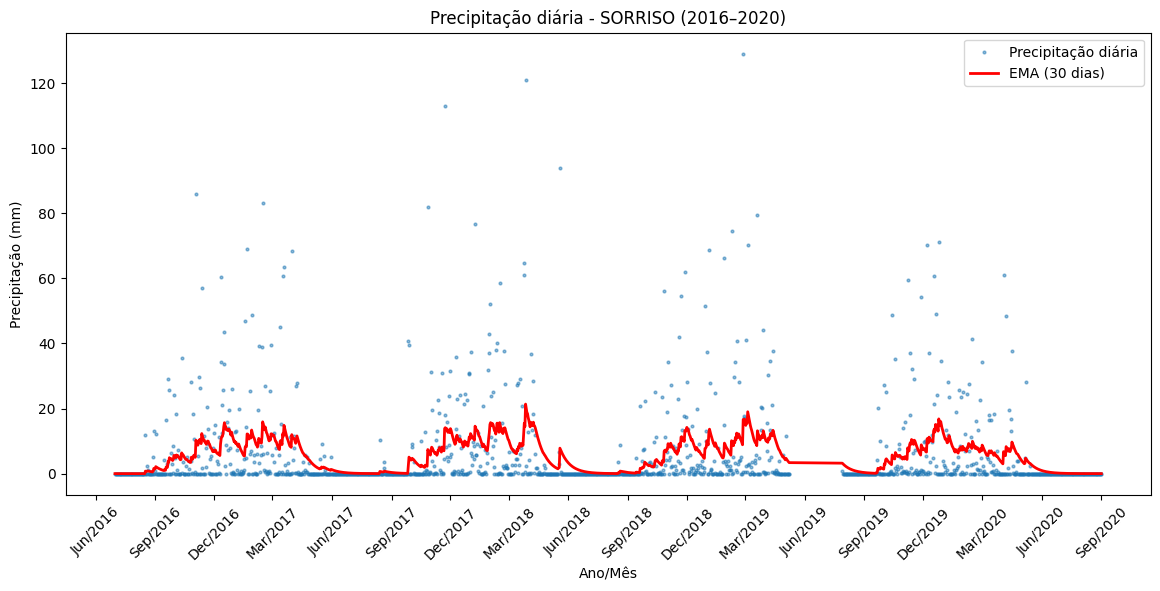

In [ ]:
import matplotlib.dates as mdates

# Filtra de 2016 a 2020
df_periodo = df_cidade[(df_cidade["Data"].dt.year >= 2016) & (df_cidade["Data"].dt.year <= 2020)].copy()

# Calcula a precipitação diária
precipitacao_diaria = df_periodo.groupby("Data")["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].sum()

# Calcula a média móvel exponencial (EMA) - janela de 30 dias
ema_30 = precipitacao_diaria.ewm(span=30, adjust=False).mean()

# Gráfico - Série temporal com EMA
plt.figure(figsize=(14, 6))
plt.plot(precipitacao_diaria.index, precipitacao_diaria.values, marker="o", markersize=2,
         linestyle="", alpha=0.5, label="Precipitação diária")
plt.plot(ema_30.index, ema_30.values, color="red", linewidth=2,
         label="EMA (30 dias)")

plt.title(f"Precipitação diária - {cidade_escolhida} (2016–2020)")
plt.xlabel("Ano/Mês")
plt.ylabel("Precipitação (mm)")
plt.legend()

# Formatar eixo X para mostrar meses
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b/%Y"))  # ex.: Jan/2016
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))   # mostra a cada 3 meses
plt.xticks(rotation=45)

plt.show()


### Cidade de sorriso para o ano de 2018 e 2019 com médias EMA

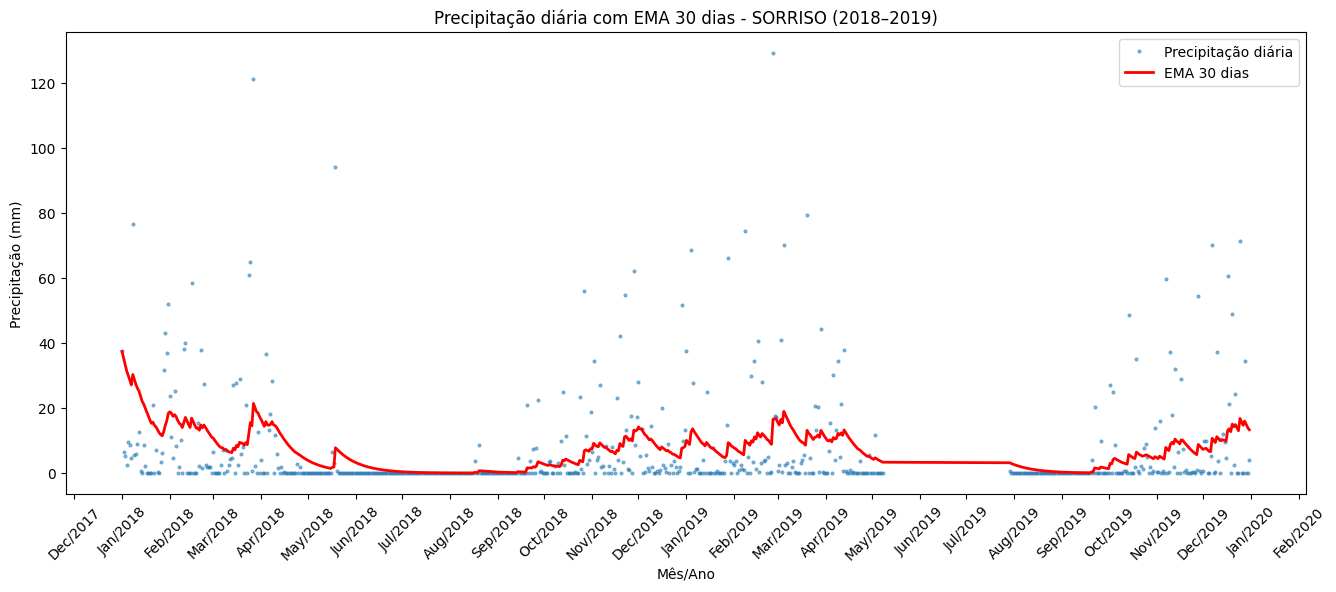

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Filtra apenas 2018 e 2019
df_periodo = df_cidade[(df_cidade["Data"].dt.year >= 2018) & (df_cidade["Data"].dt.year <= 2019)].copy()

# Calcula a precipitação diária
precipitacao_diaria = df_periodo.groupby("Data")["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].sum()

# Calcula a EMA com suavização de 30 dias
ema_30 = precipitacao_diaria.ewm(span=30, adjust=False).mean()

# Gráfico - Série temporal com EMA
plt.figure(figsize=(16, 6))
plt.plot(precipitacao_diaria.index, precipitacao_diaria.values, marker="o", markersize=2,
         linestyle="", alpha=0.5, label="Precipitação diária")
plt.plot(ema_30.index, ema_30.values, color="red", linewidth=2, label="EMA 30 dias")

plt.title(f"Precipitação diária com EMA 30 dias - {cidade_escolhida} (2018–2019)")
plt.xlabel("Mês/Ano")
plt.ylabel("Precipitação (mm)")
plt.legend()

# Formatar eixo X para mostrar mês a mês
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b/%Y"))
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

plt.show()


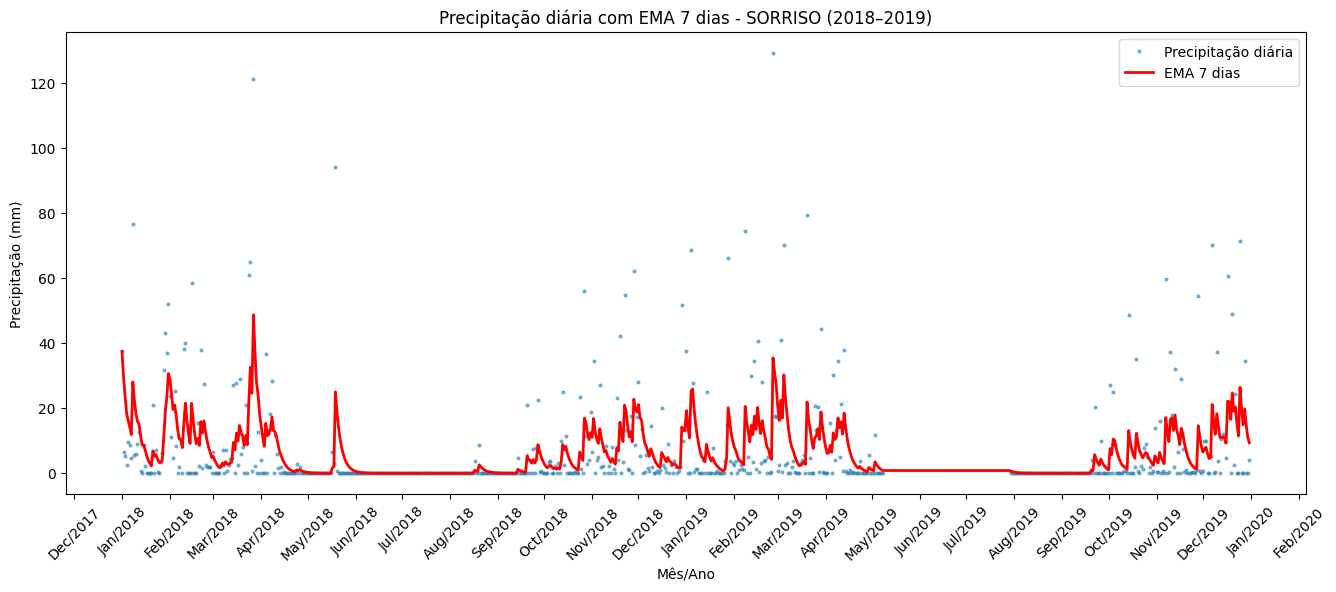

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Filtra apenas 2018 e 2019
df_periodo = df_cidade[(df_cidade["Data"].dt.year >= 2018) & (df_cidade["Data"].dt.year <= 2019)].copy()

# Calcula a precipitação diária
precipitacao_diaria = df_periodo.groupby("Data")["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].sum()

# Calcula a EMA com suavização de 7 dias
ema_7 = precipitacao_diaria.ewm(span=7, adjust=False).mean()

# Gráfico - Série temporal com EMA
plt.figure(figsize=(16, 6))
plt.plot(precipitacao_diaria.index, precipitacao_diaria.values, marker="o", markersize=2,
         linestyle="", alpha=0.5, label="Precipitação diária")
plt.plot(ema_7.index, ema_7.values, color="red", linewidth=2, label="EMA 7 dias")

plt.title(f"Precipitação diária com EMA 7 dias - {cidade_escolhida} (2018–2019)")
plt.xlabel("Mês/Ano")
plt.ylabel("Precipitação (mm)")
plt.legend()

# Formatar eixo X para mostrar mês a mês
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b/%Y"))
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

plt.show()


### 6. Verificando o firewatch para a cidade de sorriso
Agora iremos verificar os incendios no ano de 2024 para a cidade de sorriso, a fim de verificar se há algum padrão.

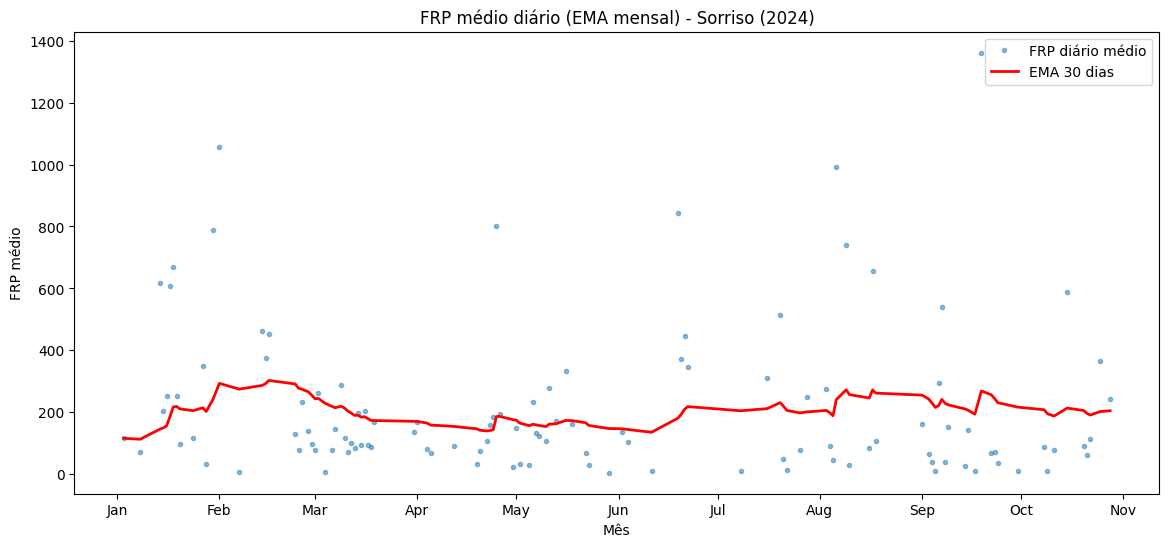

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Carregar dataset
caminho_filtrado = "/home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/unified/dados_filtrados.csv"
df_filtrado_firewatch = pd.read_csv(caminho_filtrado)

# Converter coluna de data para datetime
df_filtrado_firewatch["data"] = pd.to_datetime(df_filtrado_firewatch["data"], format="%Y-%m-%d")

# Filtrar apenas Sorriso e ano desejado
ano_escolhido = 2024
df_ano = df_filtrado_firewatch[
    (df_filtrado_firewatch["data"].dt.year == ano_escolhido) & 
    (df_filtrado_firewatch["municipio"].str.lower() == "sorriso")
]

# Agregar FRP diário (média)
frp_diario = df_ano.groupby("data")["avg_frp"].mean()

# Calcular EMA de 30 dias para suavizar
frp_ema = frp_diario.ewm(span=30, adjust=False).mean()

# Plot
plt.figure(figsize=(14,6))
plt.plot(frp_diario.index, frp_diario.values, marker="o", markersize=3, linestyle="", alpha=0.5, label="FRP diário médio")
plt.plot(frp_ema.index, frp_ema.values, color="red", linewidth=2, label="EMA 30 dias")

plt.title(f"FRP médio diário (EMA mensal) - Sorriso ({ano_escolhido})")
plt.xlabel("Mês")
plt.ylabel("FRP médio")

# Configurar eixo X para mostrar meses
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())        # marca cada mês
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # nomes abreviados dos meses
plt.xticks(rotation=0)
plt.legend()
plt.show()


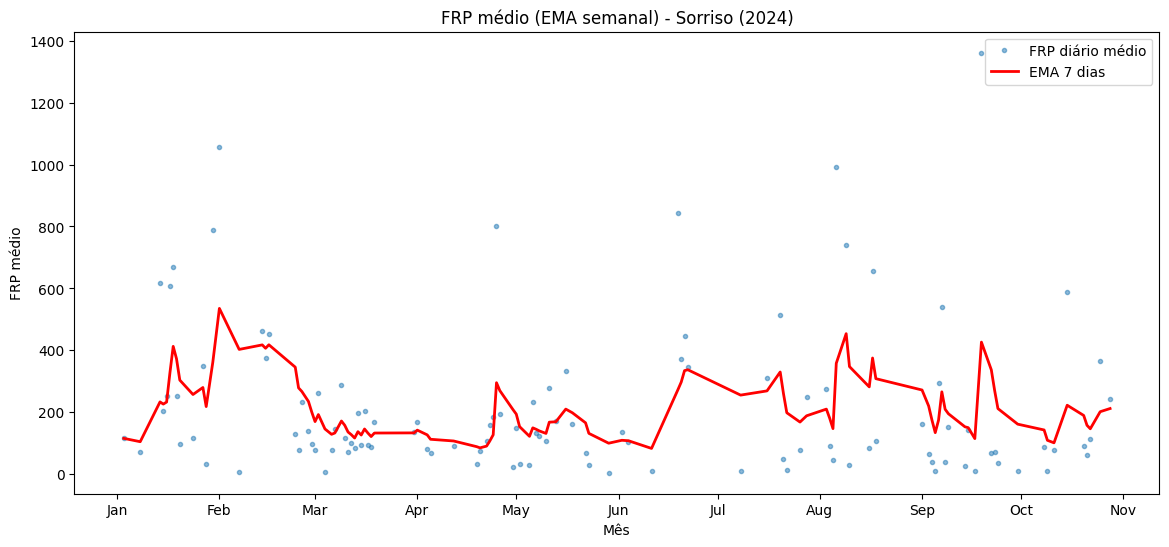

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Carregar dataset
caminho_filtrado = "/home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/unified/dados_filtrados.csv"
df_filtrado_firewatch = pd.read_csv(caminho_filtrado)

# Converter coluna de data para datetime
df_filtrado_firewatch["data"] = pd.to_datetime(df_filtrado_firewatch["data"], format="%Y-%m-%d")

# Filtrar apenas Sorriso e ano desejado
ano_escolhido = 2024
df_ano = df_filtrado_firewatch[
    (df_filtrado_firewatch["data"].dt.year == ano_escolhido) & 
    (df_filtrado_firewatch["municipio"].str.lower() == "sorriso")
]

# Agregar FRP diário (média)
frp_diario = df_ano.groupby("data")["avg_frp"].mean()

# Calcular EMA de 7 dias para suavizar
frp_ema_7 = frp_diario.ewm(span=7, adjust=False).mean()

# Plot
plt.figure(figsize=(14,6))
plt.plot(frp_diario.index, frp_diario.values, marker="o", markersize=3, linestyle="", alpha=0.5, label="FRP diário médio")
plt.plot(frp_ema_7.index, frp_ema_7.values, color="red", linewidth=2, label="EMA 7 dias")

plt.title(f"FRP médio (EMA semanal) - Sorriso ({ano_escolhido})")
plt.xlabel("Mês")
plt.ylabel("FRP médio")

# Configurar eixo X para mostrar meses
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())        # marca cada mês
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # nomes abreviados dos meses
plt.xticks(rotation=0)
plt.legend()
plt.show()


### 5. Calculando para todos os dados contidos no dataset

In [ ]:
df_climate_simplificado

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",region,state,station,station_code
0,138998,2017-12-20,14:00,0.0,CO,DF,PARANOA (COOPA-DF),A047
1,138999,2017-12-20,15:00,0.0,CO,DF,PARANOA (COOPA-DF),A047
2,139000,2017-12-20,16:00,0.0,CO,DF,PARANOA (COOPA-DF),A047
3,139001,2017-12-20,17:00,0.0,CO,DF,PARANOA (COOPA-DF),A047
4,139002,2017-12-20,18:00,0.0,CO,DF,PARANOA (COOPA-DF),A047
...,...,...,...,...,...,...,...,...
11427115,138993,2017-12-20,09:00,0.0,CO,DF,PARANOA (COOPA-DF),A047
11427116,138994,2017-12-20,10:00,0.0,CO,DF,PARANOA (COOPA-DF),A047
11427117,138995,2017-12-20,11:00,0.0,CO,DF,PARANOA (COOPA-DF),A047
11427118,138996,2017-12-20,12:00,0.0,CO,DF,PARANOA (COOPA-DF),A047


In [ ]:
import pandas as pd
from pathlib import Path

file_path = "/home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/unified/dados_climate.csv"
output_dir = Path("/home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/unified/treated_data")
output_dir.mkdir(parents=True, exist_ok=True)

chunksize = 250_000
chunk_id = 0
arquivos_parciais = []

# Processar em pedaços
for chunk in pd.read_csv(file_path, chunksize=chunksize):
    # Garantir tipos
    chunk["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"] = pd.to_numeric(
        chunk["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"], errors="coerce"
    )
    chunk = chunk[chunk["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"] >= 0]
    chunk["Data"] = pd.to_datetime(chunk["Data"], format="%Y-%m-%d")

    # Agrupar por cidade e data para obter precipitação diária
    precip_diaria = (
        chunk
        .groupby(["station", chunk["Data"].dt.date])["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"]
        .sum()
        .reset_index()
        .rename(columns={"Data": "Data_diaria", "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)": "Precipitação_diária"})
    )

    # Salvar resultado parcial
    output_file = output_dir / f"precipitacao_diaria_chunk_{chunk_id}.csv"
    precip_diaria.to_csv(output_file, index=False)
    arquivos_parciais.append(output_file)

    print(f"✅ Chunk {chunk_id} processado e salvo em {output_file}")
    chunk_id += 1

# ---- JUNTAR RESULTADOS PARCIAIS ----
print("\n🔄 Juntando resultados parciais...")

dfs = [pd.read_csv(f) for f in arquivos_parciais]
precipitacao_diaria_por_cidade = pd.concat(dfs, ignore_index=True)

# Calcular resumo final
resumo_cidades = (
    precipitacao_diaria_por_cidade
    .groupby("station")
    .agg(
        media_precipitacao_diaria=("Precipitação_diária", "mean"),
        dias_sem_chuva=("Precipitação_diária", lambda x: (x == 0).sum())
    )
    .reset_index()
)

# Salvar resumo final
resumo_cidades.to_csv(output_dir / "resumo_cidades.csv", index=False)
print(f"📊 Resumo final salvo em {output_dir / 'resumo_cidades.csv'}")


✅ Chunk 0 processado e salvo em /home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/unified/treated_data/precipitacao_diaria_chunk_0.csv
✅ Chunk 1 processado e salvo em /home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/unified/treated_data/precipitacao_diaria_chunk_1.csv
✅ Chunk 2 processado e salvo em /home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/unified/treated_data/precipitacao_diaria_chunk_2.csv
✅ Chunk 3 processado e salvo em /home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/unified/treated_data/precipitacao_diaria_chunk_3.csv
✅ Chunk 4 processado e salvo em /home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/unified/treated_data/precipitacao_diaria_chunk_4.csv
✅ Chunk 5 processado e salvo em /home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/unified/treated_data/precipitacao_diaria_chunk_5.csv
✅ Chunk 6 processado e

In [ ]:
precipitacao_diaria_por_cidade

,station,Data_diaria,Precipitação_diária
0,AGUA CLARA,2017-01-01,11.4
1,AGUA CLARA,2017-01-02,1.6
2,AGUA CLARA,2017-01-03,1.6
3,AGUA CLARA,2017-01-04,15.4
4,AGUA CLARA,2017-01-05,6.2
...,...,...,...
407273,VILA BELA DA SANTISSIMA TRINDADE,2017-12-27,8.8
407274,VILA BELA DA SANTISSIMA TRINDADE,2017-12-28,0.2
407275,VILA BELA DA SANTISSIMA TRINDADE,2017-12-29,0.0
407276,VILA BELA DA SANTISSIMA TRINDADE,2017-12-30,0.0


# Analisando e Comparando os Dados

Antes de prosseguirmos com visualizações mais complexas, realizamos uma **análise preliminar dos top 15 municípios** em dois critérios principais:

1. **Cidades mais secas** – aquelas com maior número de dias sem chuva, identificadas a partir do dataset de clima.  
2. **Cidades com maior FRP médio** – localidades com maior intensidade de focos de incêndio, obtidas do dataset Firewatch.

Os gráficos a seguir irão **comparar e correlacionar esses resultados**, com o objetivo de investigar se existe **uma relação entre seca e incêndios**.  

Essa etapa inicial é fundamental para **entender padrões espaciais e temporais**, servindo como base para análises posteriores, como mapas de proximidade entre cidades secas e com alto FRP.


/tmp/ipykernel_5553/3886874518.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_5553/3886874518.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


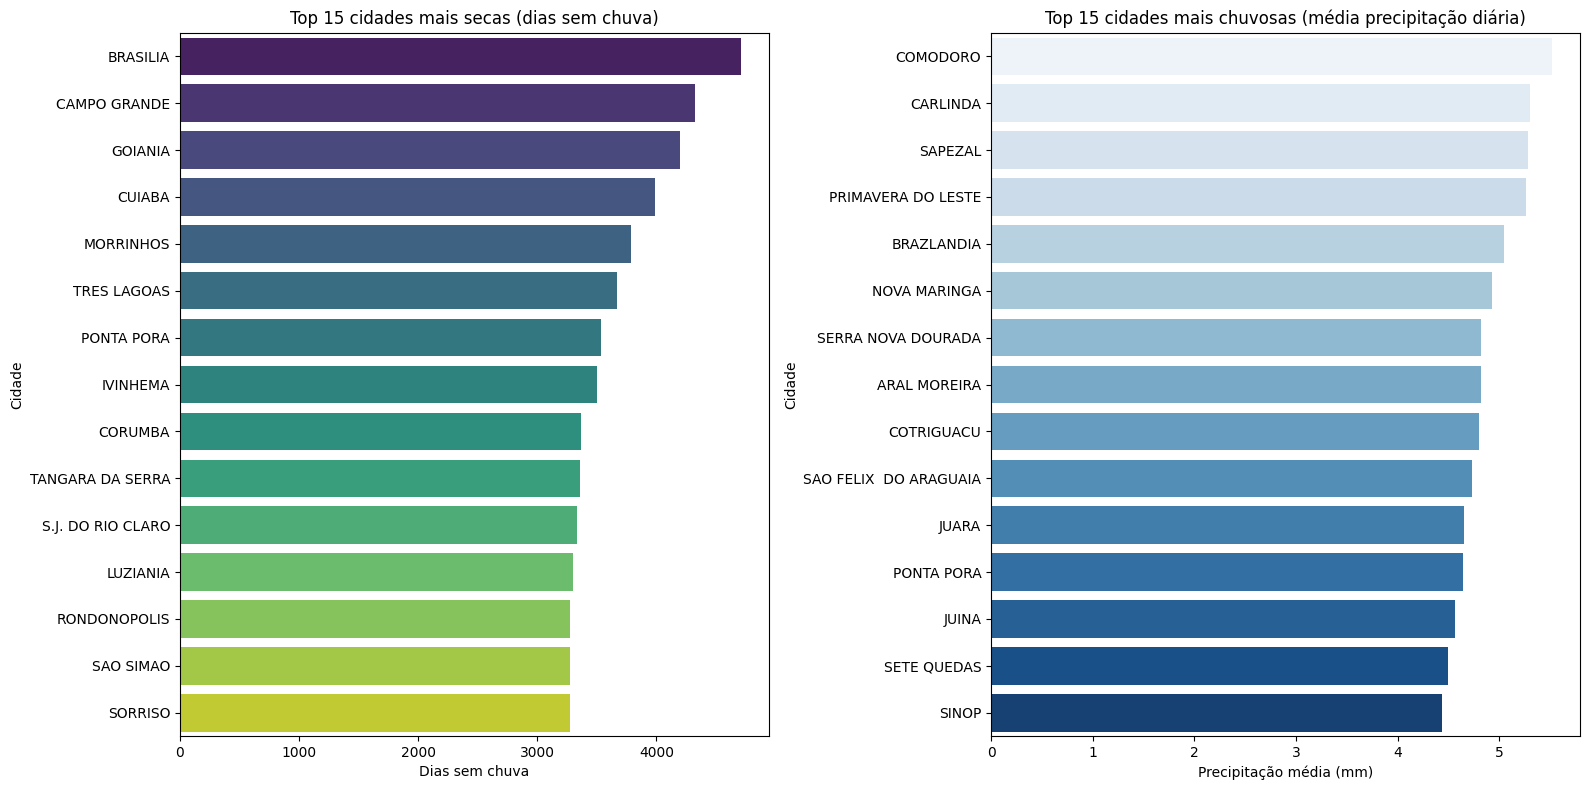

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dataset
df_secas = pd.read_csv("/home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/unified/treated_data/resumo_cidades.csv")

# Top 15 mais secas
df_top_secas = df_secas.sort_values(by="dias_sem_chuva", ascending=False).head(15)

# Top 15 mais chuvosas
df_top_chuvosas = df_secas.sort_values(by="media_precipitacao_diaria", ascending=False).head(15)

# Criar subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Mais secas
sns.barplot(
    data=df_top_secas,
    y="station",
    x="dias_sem_chuva",
    palette="viridis",
    ax=axes[0]
)
axes[0].set_title("Top 15 cidades mais secas (dias sem chuva)")
axes[0].set_xlabel("Dias sem chuva")
axes[0].set_ylabel("Cidade")

# Mais chuvosas
sns.barplot(
    data=df_top_chuvosas,
    y="station",
    x="media_precipitacao_diaria",
    palette="Blues",
    ax=axes[1]
)
axes[1].set_title("Top 15 cidades mais chuvosas (média precipitação diária)")
axes[1].set_xlabel("Precipitação média (mm)")
axes[1].set_ylabel("Cidade")

plt.tight_layout()
plt.show()


/tmp/ipykernel_5553/3923292070.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


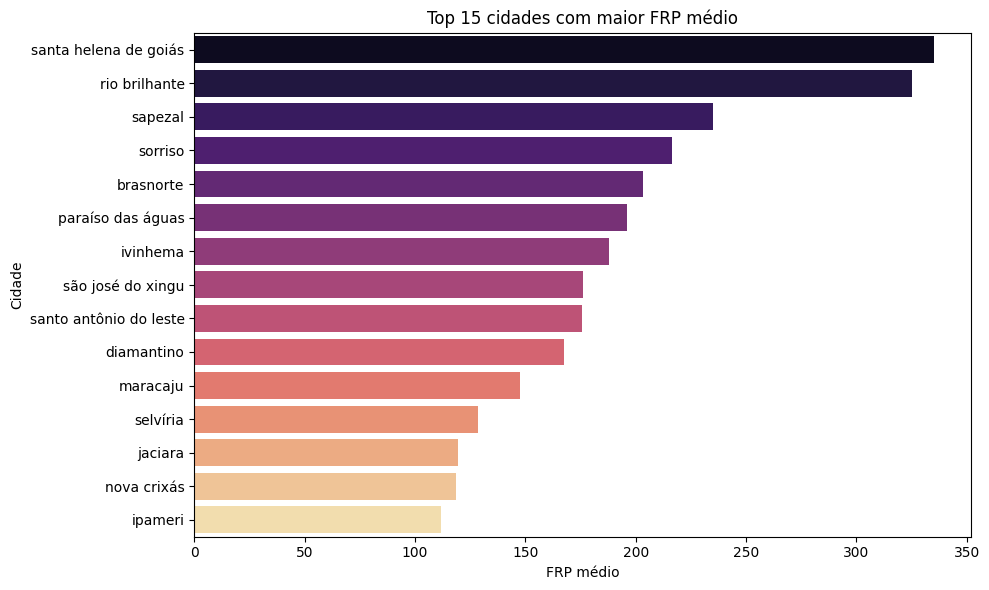

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dataset filtrado
caminho = "/home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/unified/dados_filtrados.csv"
df_firewatch = pd.read_csv(caminho)

# Agrupar por município e calcular média de FRP
df_frp = df_firewatch.groupby("municipio")["avg_frp"].mean().reset_index()

# Ordenar pelas top 15
df_top_frp = df_frp.sort_values(by="avg_frp", ascending=False).head(15)

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_top_frp,
    y="municipio",
    x="avg_frp",
    palette="magma"
)

plt.title("Top 15 cidades com maior FRP médio")
plt.xlabel("FRP médio")
plt.ylabel("Cidade")
plt.tight_layout()
plt.show()


## Traçando as 15 cidades mais secas 

Abaixo iremos evidenciar as 15 cidades mais secas e as 15 cidades com maiores níveis de incêndio

In [ ]:
import pandas as pd

# Caminhos dos arquivos
caminho_resumo = "/home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/unified/treated_data/resumo_cidades.csv"
caminho_firewatch = "/home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/unified/dados_filtrados.csv"

# Carregar datasets
df_secas = pd.read_csv(caminho_resumo)
df_firewatch = pd.read_csv(caminho_firewatch)

# Top 15 cidades mais secas (dias sem chuva)
top_secas = df_secas.sort_values(by="dias_sem_chuva", ascending=False).head(15)

# Top 15 cidades com maior FRP médio
top_frp = df_firewatch.groupby("municipio")["avg_frp"].mean().reset_index()
top_frp = top_frp.sort_values(by="avg_frp", ascending=False).head(15)

# Exibir no terminal
print("\n===== Top 15 cidades mais secas (dias sem chuva) =====\n")
print(top_secas[["station", "dias_sem_chuva"]].to_string(index=False))

print("\n===== Top 15 cidades com maior FRP médio =====\n")
print(top_frp.to_string(index=False))



===== Top 15 cidades mais secas (dias sem chuva) =====

          station  dias_sem_chuva
         BRASILIA            4709
     CAMPO GRANDE            4328
          GOIANIA            4202
           CUIABA            3986
        MORRINHOS            3786
      TRES LAGOAS            3671
       PONTA PORA            3538
         IVINHEMA            3498
          CORUMBA            3366
 TANGARA DA SERRA            3360
S.J. DO RIO CLARO            3332
         LUZIANIA            3297
     RONDONOPOLIS            3278
        SAO SIMAO            3274
          SORRISO            3274

===== Top 15 cidades com maior FRP médio =====

             municipio    avg_frp
 santa helena de goiás 335.315469
         rio brilhante 325.128833
               sapezal 234.992814
               sorriso 216.580916
             brasnorte 203.075919
     paraíso das águas 195.868701
              ivinhema 187.740278
     são josé do xingu 176.048901
santo antônio do leste 175.789468
          

### Buscando as Cidades Mais Próximas

Neste código, iremos identificar as cidades que estão **geograficamente próximas** umas das outras, considerando dois critérios principais:

1. **Cidades mais secas** – aquelas com maior número de dias sem chuva.  
2. **Cidades com maior índice de incêndio (FRP)** – locais com maior Fire Radiative Power médio.

O objetivo é verificar se há uma **relação espacial** entre a seca e os incêndios, ou seja, se cidades mais secas tendem a apresentar mais focos de incêndio.  

#### Passo a passo do código:

1. **Listagem das top cidades**  
   - `cidades_secas`: lista com as cidades mais secas.  
   - `cidades_frp`: lista com as cidades com maior FRP médio.

2. **Geocodificação das cidades**  
   - Usando `geopy.Nominatim`, buscamos as **coordenadas geográficas** (latitude e longitude) de cada cidade.

3. **Cálculo das distâncias**  
   - Utilizando a função `geodesic` do `geopy.distance`, calculamos a distância entre **cada cidade seca** e **cada cidade FRP**.

4. **Organização dos resultados**  
   - As distâncias são armazenadas em um DataFrame `df_dist`.  
   - Os resultados são ordenados pela **menor distância**, permitindo identificar rapidamente os pares de cidades mais próximas.

> Resultado esperado:  
> Uma tabela com as combinações de cidades secas e cidades com maior FRP, ordenadas pela proximidade, mostrando os **20 pares mais próximos**.


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

# Top cidades (coloquei como exemplo, mas use seus DataFrames top_secas e top_frp)
cidades_secas = top_secas["station"].tolist()
cidades_frp = top_frp["municipio"].tolist()

# Inicializar geocodificador
geolocator = Nominatim(user_agent="geoapi_exemplo")

# Função para buscar coordenadas
def get_coords(cidade, estado="Brazil"):
    try:
        location = geolocator.geocode(f"{cidade}, {estado}")
        if location:
            return (location.latitude, location.longitude)
    except:
        return None
    return None

# Criar dicionário com coordenadas
coords_secas = {cidade: get_coords(cidade) for cidade in cidades_secas}
coords_frp = {cidade: get_coords(cidade) for cidade in cidades_frp}

# Calcular distâncias entre todas combinações
distancias = []
for c1, coord1 in coords_secas.items():
    if coord1:
        for c2, coord2 in coords_frp.items():
            if coord2:
                dist_km = geodesic(coord1, coord2).km
                distancias.append((c1, c2, dist_km))

# Converter para DataFrame e ordenar
df_dist = pd.DataFrame(distancias, columns=["Cidade_Seca", "Cidade_FRP", "Distancia_km"])
df_dist = df_dist.sort_values(by="Distancia_km")

print("\n===== Cidades mais próximas (Seca x FRP) =====\n")
print(df_dist.head(20).to_string(index=False))



===== Cidades mais próximas (Seca x FRP) =====

     Cidade_Seca            Cidade_FRP  Distancia_km
        IVINHEMA              ivinhema      0.000000
         SORRISO               sorriso      0.000000
     TRES LAGOAS              selvíria     55.428581
    RONDONOPOLIS               jaciara     66.775796
        BRASILIA     são josé do xingu     72.734266
        IVINHEMA         rio brilhante     92.162262
       MORRINHOS               ipameri    100.537162
TANGARA DA SERRA            diamantino    116.166911
      PONTA PORA              maracaju    116.333505
          CUIABA               jaciara    126.517382
          CUIABA            diamantino    137.116138
    CAMPO GRANDE              maracaju    139.728892
      PONTA PORA         rio brilhante    145.750537
    CAMPO GRANDE         rio brilhante    148.626405
        IVINHEMA              maracaju    157.609481
       MORRINHOS santa helena de goiás    158.421669
         GOIANIA               ipameri    163.8126

### Gerando um Mapa Interativo com Folium

O objetivo deste código é criar um **mapa interativo** que permite visualizar geograficamente:

1. **Cidades mais secas** (com maior número de dias sem chuva)  
2. **Cidades com maior FRP médio** (indicador de fogo ativo)

O mapa será gerado em formato HTML e poderá ser aberto diretamente no navegador.

#### Passo a passo do código:

1. **Importação das bibliotecas**  
   - `pandas` para manipulação de dados.  
   - `folium` para criação do mapa interativo.  
   - `geopy` para geocodificação (transformar nome da cidade em coordenadas latitude/longitude).

2. **Carregamento dos datasets**  
   - `resumo_cidades.csv` → contém estatísticas de precipitação e dias sem chuva.  
   - `dados_filtrados.csv` → contém dados de FRP (Fire Radiative Power) diário.

3. **Seleção das top cidades**  
   - Top 15 cidades mais secas (`dias_sem_chuva`).  
   - Top 15 cidades com maior FRP médio (`avg_frp`).

4. **Geocodificação das cidades**  
   - Usando `geopy.Nominatim`, convertemos o nome da cidade em coordenadas geográficas.  
   - Isso permite posicionar os pontos corretamente no mapa.

5. **Criação do mapa com Folium**  
   - Inicializamos o mapa centralizado no Brasil.  
   - Adicionamos **círculos azuis** para cidades mais secas.  
   - Adicionamos **círculos vermelhos** para cidades com maior FRP.  
   - Cada ponto possui um **popup** exibindo o nome da cidade e o valor correspondente.

6. **Exportação para HTML**  
   - O mapa é salvo como `mapa_cidades_secas_frp.html` e pode ser aberto no navegador para análise interativa.

> Resultado esperado:  
> Um mapa interativo mostrando a distribuição geográfica das cidades mais secas e das cidades com maior FRP, permitindo visualizar possíveis sobreposições ou proximidade entre esses fenômenos.


In [ ]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Carregar datasets
caminho_resumo = "/home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/unified/treated_data/resumo_cidades.csv"
caminho_firewatch = "/home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/unified/dados_filtrados.csv"

df_secas = pd.read_csv(caminho_resumo)
df_firewatch = pd.read_csv(caminho_firewatch)

# Top 15 cidades
top_secas = df_secas.sort_values(by="dias_sem_chuva", ascending=False).head(15)
top_frp = df_firewatch.groupby("municipio")["avg_frp"].mean().reset_index()
top_frp = top_frp.sort_values(by="avg_frp", ascending=False).head(15)

# Inicializar geocodificador
geolocator = Nominatim(user_agent="geoapi_exemplo")

def get_coords(cidade, estado="Brazil"):
    try:
        location = geolocator.geocode(f"{cidade}, {estado}", timeout=10)
        if location:
            return (location.latitude, location.longitude)
    except GeocoderTimedOut:
        return None
    return None

# Adicionar coordenadas aos DataFrames
top_secas["coords"] = top_secas["station"].apply(get_coords)
top_frp["coords"] = top_frp["municipio"].apply(get_coords)

# Criar mapa centralizado no Brasil
m = folium.Map(location=[-15.7801, -47.9292], zoom_start=5)

# Adicionar cidades mais secas (azul)
for _, row in top_secas.iterrows():
    if row["coords"]:
        folium.CircleMarker(
            location=row["coords"],
            radius=7,
            color="blue",
            fill=True,
            fill_color="blue",
            fill_opacity=0.6,
            popup=f"{row['station']} - {row['dias_sem_chuva']} dias sem chuva"
        ).add_to(m)

# Adicionar cidades com maior FRP (vermelho)
for _, row in top_frp.iterrows():
    if row["coords"]:
        folium.CircleMarker(
            location=row["coords"],
            radius=7,
            color="red",
            fill=True,
            fill_color="red",
            fill_opacity=0.6,
            popup=f"{row['municipio']} - FRP médio: {row['avg_frp']:.2f}"
        ).add_to(m)

# Salvar mapa
m.save("mapa_cidades_secas_frp.html")
print("Mapa gerado: mapa_cidades_secas_frp.html")


Mapa gerado: mapa_cidades_secas_frp.html


### Filtragem dos Dados do Firewatch para a Região Centro-Oeste

Para garantir consistência entre os dados climáticos e os registros de incêndio, realizamos um pré-processamento nos datasets trimestrais do Firewatch. O objetivo foi **manter apenas as cidades que fazem parte da região Centro-Oeste**, conforme listado no arquivo `Dataset_FireWatch_Brazil_Central_West.csv`. 

#### Passos realizados:

1. **Carregamento dos datasets**  
   Foram carregados os quatro arquivos trimestrais do Firewatch (`Q1` a `Q4`) e o CSV de referência da região Centro-Oeste.

2. **Normalização dos nomes das cidades**  
   Para evitar inconsistências devido a acentos ou diferenças de capitalização, todos os nomes de municípios foram transformados para letras maiúsculas e normalizados para ASCII.

3. **Filtragem por interseção**  
   Cada dataset trimestral foi filtrado para conter **apenas as cidades presentes no CSV Central-West**, garantindo que todas as observações tenham correspondência com os dados climáticos disponíveis.

4. **Salvamento dos datasets filtrados**  
   Os quatro datasets resultantes foram salvos separadamente em arquivos CSV, prontos para serem usados nos pipelines de treino e validação.

#### Objetivo acadêmico:

Essa filtragem é essencial para evitar a inclusão de cidades sem dados climáticos completos, garantindo que os modelos de previsão de incêndios (como SVM ou HistGradientBoostingClassifier) sejam treinados e avaliados de maneira consistente e confiável. Além disso, facilita o tratamento de valores ausentes e mantém o foco na região de estudo.


In [100]:
import pandas as pd
from pathlib import Path
import unicodedata

# ---- Caminhos ----
base_dir = Path("/home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/")
resumo_path = base_dir / "unified/treated_data/resumo_cidades.csv"
firewatch_files = [
    base_dir / "firewatch-2024/Dataset_FireWatch_Brazil_Q1_2024.csv",
    base_dir / "firewatch-2024/Dataset_FireWatch_Brazil_Q2_2024.csv",
    base_dir / "firewatch-2024/Dataset_FireWatch_Brazil_Q3_2024.csv",
    base_dir / "firewatch-2024/Dataset_FireWatch_Brazil_Q4_2024.csv",
]
centralwest_csv = base_dir / "firewatch-2024/Dataset_FireWatch_Brazil_Central_West.csv"

# ---- Função de normalização de nomes ----
def normalize_city(name):
    if pd.isna(name):
        return None
    return (
        unicodedata.normalize("NFKD", str(name))
        .encode("ASCII", "ignore")
        .decode("utf-8")
        .upper()
        .strip()
    )

# ---- Função para consolidar clima e manter apenas avg_frp/avg_risco_fogo ----
def consolidar_clima(df):
    # Consolidar precipitação apenas se existir
    if "media_precipitacao_diaria" in df.columns and "avg_precipitacao" in df.columns:
        df["precipitacao_tmp"] = df["media_precipitacao_diaria"].fillna(df["avg_precipitacao"])
        global_mean_precipitacao = df["precipitacao_tmp"].mean()
        df["media_precipitacao_diaria"] = df["precipitacao_tmp"].fillna(global_mean_precipitacao)
    
    # Consolidar dias sem chuva apenas se existir
    if "dias_sem_chuva" in df.columns and "avg_numero_dias_sem_chuva" in df.columns:
        df["dias_tmp"] = df["dias_sem_chuva"].fillna(df["avg_numero_dias_sem_chuva"])
        global_mean_dias = df["dias_tmp"].mean()
        df["dias_sem_chuva"] = df["dias_tmp"].fillna(global_mean_dias)
    
    # Dropar temporárias e todas colunas avg_ exceto avg_frp e avg_risco_fogo
    cols_to_keep = ["avg_frp", "avg_risco_fogo"]
    cols_drop = [c for c in df.columns if c.startswith("avg_") and c not in cols_to_keep] + ["precipitacao_tmp", "dias_tmp"]
    df = df.drop(columns=[c for c in cols_drop if c in df.columns])
    
    return df


# ---- Carregar datasets ----
df_resumo = pd.read_csv(resumo_path)
df_cw = pd.read_csv(centralwest_csv)  # CSV com cidades do Centro-Oeste

dfs_firewatch = [pd.read_csv(f) for f in firewatch_files]

# ---- Normalizar nomes de cidades ----
df_resumo["station_norm"] = df_resumo["station"].apply(normalize_city)
df_cw["municipio_norm"] = df_cw["municipio"].apply(normalize_city)
for df in dfs_firewatch:
    df["municipio_norm"] = df["municipio"].apply(normalize_city)

# ---- Filtrar cada trimestre apenas para cidades do Centro-Oeste ----
dfs_firewatch_filtered = [
    df[df["municipio_norm"].isin(df_cw["municipio_norm"])] for df in dfs_firewatch
]

# ---- Exibir colunas antes da consolidação do primeiro trimestre ----
print("Colunas do primeiro trimestre antes de consolidar_clima:")
print(dfs_firewatch_filtered[0].columns.tolist())

# ---- Aplicar consolidação em todos os trimestres ----
dfs_firewatch_consolidados = [consolidar_clima(df) for df in dfs_firewatch_filtered]

# ---- Exibir colunas depois da consolidação do primeiro trimestre ----
print("\nColunas do primeiro trimestre depois de consolidar_clima:")
print(dfs_firewatch_consolidados[0].columns.tolist())

# ---- Exibir primeiras linhas para conferir ----
print("\nPrimeiras linhas do primeiro trimestre consolidado:")
print(dfs_firewatch_consolidados[0].head())

# ---- Salvar cada subconjunto filtrado e consolidado ----
output_dir = base_dir / "firewatch-2024/filtered"
output_dir.mkdir(exist_ok=True, parents=True)
for i, df in enumerate(dfs_firewatch_consolidados, start=1):
    df.to_csv(output_dir / f"Dataset_FireWatch_Brazil_CW_Q{i}_2024.csv", index=False)


Colunas do primeiro trimestre antes de consolidar_clima:
['data', 'municipio', 'estado', 'bioma', 'avg_numero_dias_sem_chuva', 'avg_precipitacao', 'avg_risco_fogo', 'avg_frp', 'municipio_norm']

Colunas do primeiro trimestre depois de consolidar_clima:
['data', 'municipio', 'estado', 'bioma', 'avg_risco_fogo', 'avg_frp', 'municipio_norm']

Primeiras linhas do primeiro trimestre consolidado:
            data      municipio              estado           bioma  \
223   2024-01-01       IVINHEMA  MATO GROSSO DO SUL  Mata Atlântica   
233   2024-01-01      BRASNORTE         MATO GROSSO        Amazônia   
574   2024-01-02      BRASNORTE         MATO GROSSO         Cerrado   
575   2024-01-02      BRASNORTE         MATO GROSSO        Amazônia   
1098  2024-01-03  RIO BRILHANTE  MATO GROSSO DO SUL  Mata Atlântica   

      avg_risco_fogo  avg_frp municipio_norm  
223             6.00   146.00       IVINHEMA  
233             0.00    57.33      BRASNORTE  
574             0.00    89.67      BRA

## Normalizar os nomes das cidades

## 2. Preparar treino (T1–T3) e validação (T4)

Aqui unimos clima + incêndio, preenchendo FRP=0 para cidades não presentes no Firewatch.

In [1]:
# ---- Treino (T1–T3) ----
df_firewatch_train = pd.concat(dfs_firewatch_filtered[:3], ignore_index=True)
df_train = df_resumo.merge(
    df_firewatch_train,
    left_on="station_norm",
    right_on="municipio_norm",
    how="outer"
)
df_train["avg_frp"] = df_train["avg_frp"].fillna(0)
df_train["avg_risco_fogo"] = df_train["avg_risco_fogo"].fillna(0)
df_train = consolidar_clima(df_train)

# ---- Validação (T4) ----
df_val = df_resumo.merge(
    dfs_firewatch_filtered[3],
    left_on="station_norm",
    right_on="municipio_norm",
    how="outer"
)
df_val["avg_frp"] = df_val["avg_frp"].fillna(0)
df_val["avg_risco_fogo"] = df_val["avg_risco_fogo"].fillna(0)
df_val = consolidar_clima(df_val)

print("Treino:", df_train.shape)
print("Validação:", df_val.shape)


NameError: name 'pd' is not defined

In [102]:
# Para df_train
print("NaN no df_train:")
print(df_train.isna().sum())

# Para df_val
print("\nNaN no df_val:")
print(df_val.isna().sum())


NaN no df_train:
station                      846
media_precipitacao_diaria      0
dias_sem_chuva                 0
station_norm                 846
data                         108
municipio                    108
estado                       108
bioma                        108
avg_risco_fogo                 0
avg_frp                        0
municipio_norm               108
dtype: int64

NaN no df_val:
station                       96
media_precipitacao_diaria      0
dias_sem_chuva                 0
station_norm                  96
data                         108
municipio                    108
estado                       108
bioma                        108
avg_risco_fogo                 0
avg_frp                        0
municipio_norm               108
dtype: int64


In [103]:
# 1️⃣ Renomear station para municipio
df_val["municipio"] = df_val["station"]
df_train["municipio"] = df_train["station"]

# 2️⃣ Selecionar apenas colunas úteis, incluindo avg_frp e avg_risco_fogo
colunas_final = [
    "municipio",
    "media_precipitacao_diaria",
    "dias_sem_chuva",
    "avg_frp",
    "avg_risco_fogo"
]
df_val = df_val[colunas_final]
df_train = df_train[colunas_final]

# 3️⃣ Conferir
print(df_train.head())
print(df_val.head())
print("NaN df_train:", df_train.isna().sum())
print("NaN df_val:", df_val.isna().sum())


         municipio  media_precipitacao_diaria  dias_sem_chuva  avg_frp  \
0         AGUA BOA                   3.892876          2928.0      0.0   
1       AGUA CLARA                   3.120755          2273.0      0.0   
2  AGUAS EMENDADAS                   3.897756          2887.0      0.0   
3    ALTA FLORESTA                   3.589384          2448.0      0.0   
4    ALTO ARAGUAIA                   3.905127          1874.0      0.0   

   avg_risco_fogo  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
         municipio  media_precipitacao_diaria  dias_sem_chuva  avg_frp  \
0         AGUA BOA                   3.892876          2928.0      0.0   
1       AGUA CLARA                   3.120755          2273.0      0.0   
2  AGUAS EMENDADAS                   3.897756          2887.0      0.0   
3    ALTA FLORESTA                   3.589384          2448.0      0.0   
4    ALTO ARAGUAIA                   3.905127          1874.0    

In [104]:
# Para df_train
print("NaN no df_train:")
print(df_train.isna().sum())

# Para df_val
print("\nNaN no df_val:")
print(df_val.isna().sum())


NaN no df_train:
municipio                    846
media_precipitacao_diaria      0
dias_sem_chuva                 0
avg_frp                        0
avg_risco_fogo                 0
dtype: int64

NaN no df_val:
municipio                    96
media_precipitacao_diaria     0
dias_sem_chuva                0
avg_frp                       0
avg_risco_fogo                0
dtype: int64


## 3. Criar X_train, y_train, X_val, y_val

O alvo (y) será binário:

1 se avg_frp > 0

0 se avg_frp == 0

Features:

dias_sem_chuva, media_precipitacao_diaria, avg_risco_fogo (climáticas e risco de fogo).

Podemos incluir estado/bioma depois (one-hot encoding).

In [105]:
# Criar variável alvo
df_train["y"] = (df_train["avg_frp"] > 0).astype(int)
df_val["y"] = (df_val["avg_frp"] > 0).astype(int)

# Selecionar features
features = ["dias_sem_chuva", "media_precipitacao_diaria", "avg_risco_fogo"]

X_train = df_train[features]
y_train = df_train["y"]

X_val = df_val[features]
y_val = df_val["y"]

print("X_train shape:", X_train.shape)
print("Positivos treino:", y_train.sum(), "de", len(y_train))
print("Positivos validação:", y_val.sum(), "de", len(y_val))


X_train shape: (1714, 3)
Positivos treino: 1595 de 1714
Positivos validação: 188 de 300


## Treinando o SVM  

In [108]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

# Pipeline: imputação + escala + SVM
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", class_weight="balanced"))
])

# Espaço de busca expandido
param_grid = {
    "svm__C": [0.1, 1, 10, 100, 1000],
    "svm__gamma": ["scale", 0.1, 0.01, 0.001] # Auto
}

print("⚡ Rodando GridSearchCV para SVM (RBF)...")

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=2
)

# Treinar
grid.fit(X_train, y_train)

print("\n✅ Melhor combinação de hiperparâmetros:")
print(grid.best_params_)

# Previsão no conjunto de validação
y_pred = grid.predict(X_val)

# Avaliação

print("Distribuição da classe alvo (validação):")
print(y_val.value_counts())
print("\n📊 Relatório no conjunto de validação:\n")
print(classification_report(y_val, y_pred))
print("\nMatriz de confusão:\n")
print(confusion_matrix(y_val, y_pred))
print("Distribuição da classe alvo (treino):")
print(y_train.value_counts())




⚡ Rodando GridSearchCV para SVM (RBF)...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END .......................svm__C=0.1, svm__gamma=scale; total time=   0.2s
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time=   0.2s
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time=   0.2s
[CV] END .......................svm__C=0.1, svm__gamma=scale; total time=   0.3s
[CV] END .......................svm__C=0.1, svm__gamma=scale; total time=   0.3s
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time=   0.2s
[CV] END ........................svm__C=0.1, svm__gamma=0.01; total time=   0.2s
[CV] END ........................svm__C=0.1, svm__gamma=0.01; total time=   0.2s
[CV] END .........................svm__C=1, svm__gamma=scale; total time=   0.1s
[CV] END .........................svm__C=1, svm__gamma=scale; total time=   0.1s
[CV] END ........................svm__C=0.1, svm__gamma=0.01; total time=   0.5s
[CV] EN

### Imputando dados com SMOTE

Agora iremos tentar melhorar o desempenho imputando dados, a fim de reduzir o desbalanceamento (método smote)

In [110]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # usa o pipeline do imblearn
from tqdm import tqdm

# Pipeline com SMOTE dentro
pipeline = ImbPipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("svm", SVC(kernel="rbf", class_weight="balanced"))
])

# Espaço de busca expandido
param_grid = {
    "svm__C": [0.1, 1, 10, 100, 1000],
    "svm__gamma": ["scale", 0.1, 0.01, 0.001]
}

print("⚡ Rodando GridSearchCV com SMOTE + SVM (RBF)...")

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=20,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=2
)

# Treinar (SMOTE é aplicado somente no treino dentro do CV)
grid.fit(X_train, y_train)

print("\n✅ Melhor combinação de hiperparâmetros:")
print(grid.best_params_)

# Previsão no conjunto de validação (sem SMOTE)
y_pred = grid.predict(X_val)

# Avaliação
print("\n📊 Relatório no conjunto de validação:\n")
print(classification_report(y_val, y_pred))
print("\nMatriz de confusão:\n")
print(confusion_matrix(y_val, y_pred))


⚡ Rodando GridSearchCV com SMOTE + SVM (RBF)...
Fitting 20 folds for each of 20 candidates, totalling 400 fits
[CV] END .......................svm__C=0.1, svm__gamma=scale; total time=   0.6s
[CV] END .......................svm__C=0.1, svm__gamma=scale; total time=   0.5s
[CV] END .......................svm__C=0.1, svm__gamma=scale; total time=   0.5s
[CV] END .......................svm__C=0.1, svm__gamma=scale; total time=   0.7s
[CV] END .......................svm__C=0.1, svm__gamma=scale; total time=   0.5s
[CV] END .......................svm__C=0.1, svm__gamma=scale; total time=   1.0s
[CV] END .......................svm__C=0.1, svm__gamma=scale; total time=   0.5s
[CV] END .......................svm__C=0.1, svm__gamma=scale; total time=   0.9s
[CV] END .......................svm__C=0.1, svm__gamma=scale; total time=   0.8s
[CV] END .......................svm__C=0.1, svm__gamma=scale; total time=   0.5s
[CV] END .......................svm__C=0.1, svm__gamma=scale; total time=   0.5

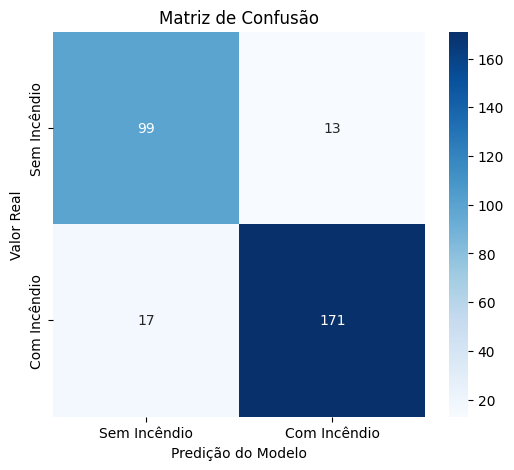

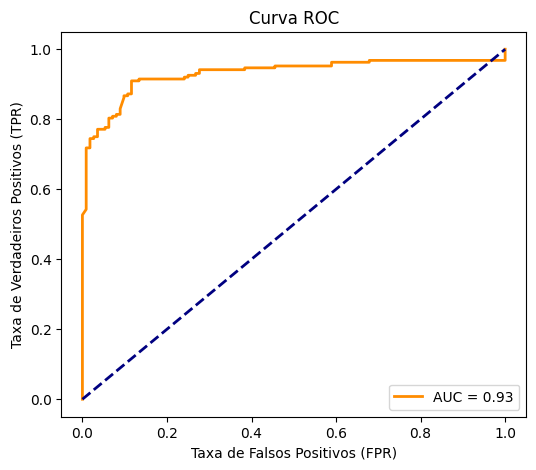

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_prob = grid.decision_function(X_val)  # para SVM

# Calcular matriz de confusão
cm = confusion_matrix(y_val, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Sem Incêndio", "Com Incêndio"], 
            yticklabels=["Sem Incêndio", "Com Incêndio"])

plt.title("Matriz de Confusão")
plt.ylabel("Valor Real")
plt.xlabel("Predição do Modelo")
plt.show()

from sklearn.metrics import roc_curve, auc

y_prob = grid.decision_function(X_val)  # para SVM
fpr, tpr, _ = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()





In [112]:
print("\n📊 Relatório no conjunto de validação:\n")
print(classification_report(y_val, y_pred))
print("\nMatriz de confusão:\n")
print(confusion_matrix(y_val, y_pred))
print("Distribuição da classe alvo (treino):")
print(y_train.value_counts())



📊 Relatório no conjunto de validação:

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       112
           1       0.93      0.91      0.92       188

    accuracy                           0.90       300
   macro avg       0.89      0.90      0.89       300
weighted avg       0.90      0.90      0.90       300


Matriz de confusão:

[[ 99  13]
 [ 17 171]]
Distribuição da classe alvo (treino):
y
1    1595
0     119
Name: count, dtype: int64


### Matriz de confusão
Agora iremos plotar a matriz de confusão.

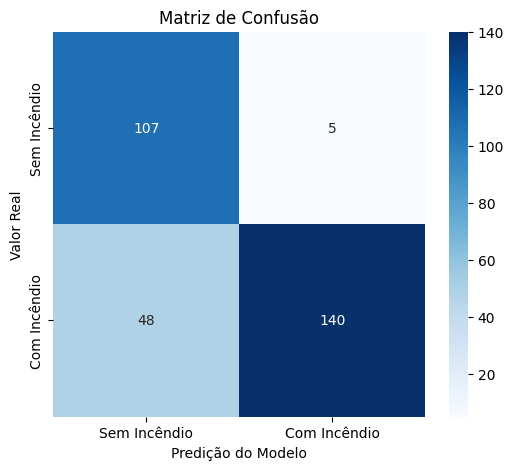

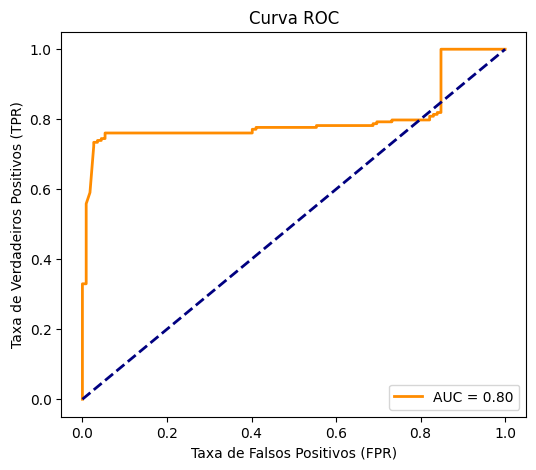

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_prob = grid.decision_function(X_val)  # para SVM

# Calcular matriz de confusão
cm = confusion_matrix(y_val, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Sem Incêndio", "Com Incêndio"], 
            yticklabels=["Sem Incêndio", "Com Incêndio"])

plt.title("Matriz de Confusão")
plt.ylabel("Valor Real")
plt.xlabel("Predição do Modelo")
plt.show()

from sklearn.metrics import roc_curve, auc

y_prob = grid.decision_function(X_val)  # para SVM
fpr, tpr, _ = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()





## Locais onde o modelo acertou e errou
Agora iremos verificar os locais cujo modelo acertou o resultado (e errou)


In [ ]:
def get_coords(city_name):
    global df_cache  # declarar antes de qualquer uso
    # Verificar cache
    cached = df_cache[df_cache["station_norm"] == city_name]
    if not cached.empty:
        return cached.iloc[0]["lat"], cached.iloc[0]["lon"]
    
    # Geocoding
    location = geocode(f"{city_name}, Brazil")
    if location:
        lat, lon = location.latitude, location.longitude
        # Adicionar ao cache
        df_cache = pd.concat([df_cache, pd.DataFrame([{
            "station_norm": city_name,
            "lat": lat,
            "lon": lon
        }])], ignore_index=True)
        return lat, lon
    else:
        return None, None


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from time import sleep

geolocator = Nominatim(user_agent="firewatch_app")

# 1️⃣ Carregar cache existente ou criar vazio
cache_path = "/home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/unified/geocode_cache.csv"
try:
    df_cache = pd.read_csv(cache_path)
except FileNotFoundError:
    df_cache = pd.DataFrame(columns=["station_norm", "lat", "lon"])

# 2️⃣ Função de geocoding com cache
def get_coords(city_name):
    global df_cache
    # Verificar cache
    cached = df_cache[df_cache["station_norm"] == city_name]
    if not cached.empty:
        return cached.iloc[0]["lat"], cached.iloc[0]["lon"]
    
    # Geocoding
    location = geolocator.geocode(f"{city_name}, Brazil")
    if location:
        lat, lon = location.latitude, location.longitude
        # Adicionar ao cache
        df_cache = pd.concat([df_cache, pd.DataFrame([{
            "station_norm": city_name,
            "lat": lat,
            "lon": lon
        }])], ignore_index=True)
        # Evitar bloqueio da API
        sleep(1)
        return lat, lon
    return None, None

# 3️⃣ Preencher df_val com coordenadas
df_val["lat"], df_val["lon"] = zip(*df_val["station_norm"].map(get_coords))

# 4️⃣ Salvar cache atualizado
df_cache.to_csv(cache_path, index=False)
print("✅ Geocoding completo e cache atualizado.")


/tmp/ipykernel_5553/948763150.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_cache = pd.concat([df_cache, pd.DataFrame([{


✅ Geocoding completo e cache atualizado.


### Passos

- Ajustar os valores na, na hora do merge;
- Aplicar one hot encoding no bioma;
- Usar auto e scale
- Com e sem smote;
- Com e sem one hot enconding
- Traçar análises individuais.

## Realizando o treinamento com one hot encoding nos biomas

In [14]:
import pandas as pd
from pathlib import Path
import unicodedata
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# ---- Caminhos ----
base_dir = Path("/home/mazner/Documents/utfpr/subjects/trabalho de conclusão de curso/datasets/")
resumo_path = base_dir / "unified/treated_data/resumo_cidades.csv"
firewatch_files = [
    base_dir / "firewatch-2024/Dataset_FireWatch_Brazil_Q1_2024.csv",
    base_dir / "firewatch-2024/Dataset_FireWatch_Brazil_Q2_2024.csv",
    base_dir / "firewatch-2024/Dataset_FireWatch_Brazil_Q3_2024.csv",
    base_dir / "firewatch-2024/Dataset_FireWatch_Brazil_Q4_2024.csv",
]
centralwest_csv = base_dir / "firewatch-2024/Dataset_FireWatch_Brazil_Central_West.csv"

# ---- Função de normalização de nomes ----
def normalize_city(name):
    if pd.isna(name):
        return None
    return (
        unicodedata.normalize("NFKD", str(name))
        .encode("ASCII", "ignore")
        .decode("utf-8")
        .upper()
        .strip()
    )

# ---- Função para consolidar clima ----
def consolidar_clima(df):
    # Precipitação
    if "media_precipitacao_diaria" in df.columns and "avg_precipitacao" in df.columns:
        df["precipitacao_tmp"] = df["media_precipitacao_diaria"].fillna(df["avg_precipitacao"])
        df["media_precipitacao_diaria"] = df["precipitacao_tmp"].fillna(df["precipitacao_tmp"].mean())
    
    # Dias sem chuva
    if "dias_sem_chuva" in df.columns and "avg_numero_dias_sem_chuva" in df.columns:
        df["dias_tmp"] = df["dias_sem_chuva"].fillna(df["avg_numero_dias_sem_chuva"])
        df["dias_sem_chuva"] = df["dias_tmp"].fillna(df["dias_tmp"].mean())
    
    # Drop temporárias e colunas avg_ exceto avg_frp e avg_risco_fogo
    cols_to_keep = ["avg_frp", "avg_risco_fogo"]
    cols_drop = [c for c in df.columns if c.startswith("avg_") and c not in cols_to_keep] + ["precipitacao_tmp", "dias_tmp"]
    df = df.drop(columns=[c for c in cols_drop if c in df.columns])
    
    return df

# ---- Carregar datasets ----
df_resumo = pd.read_csv(resumo_path)
df_cw = pd.read_csv(centralwest_csv)
dfs_firewatch = [pd.read_csv(f) for f in firewatch_files]

# ---- Normalizar nomes de cidades ----
df_resumo["station_norm"] = df_resumo["station"].apply(normalize_city)
df_cw["municipio_norm"] = df_cw["municipio"].apply(normalize_city)
for df in dfs_firewatch:
    df["municipio_norm"] = df["municipio"].apply(normalize_city)

# ---- Filtrar para Centro-Oeste ----
dfs_firewatch_filtered = [
    df[df["municipio_norm"].isin(df_cw["municipio_norm"])] for df in dfs_firewatch
]

# ---- Consolidar clima ----
dfs_firewatch_consolidados = [consolidar_clima(df) for df in dfs_firewatch_filtered]

# ---- Concatenar trimestres para treino e validação ----
df_firewatch_train = pd.concat(dfs_firewatch_consolidados[:3], ignore_index=True)
df_train = df_resumo.merge(df_firewatch_train, left_on="station_norm", right_on="municipio_norm", how="outer")
df_val = df_resumo.merge(dfs_firewatch_consolidados[3], left_on="station_norm", right_on="municipio_norm", how="outer")

# ---- Preencher avg_frp e avg_risco_fogo com 0 ----
for df in [df_train, df_val]:
    df["avg_frp"] = df["avg_frp"].fillna(0)
    df["avg_risco_fogo"] = df["avg_risco_fogo"].fillna(0)

# ---- One-hot encoding de bioma se existir ----
for df in [df_train, df_val]:
    if "bioma" in df.columns:
        df_bioma = pd.get_dummies(df["bioma"], prefix="bioma")
        df.drop(columns=["bioma"], inplace=True)
        df[ df_bioma.columns ] = df_bioma

# ---- Criar coluna municipio ----
df_train["municipio"] = df_train["station"]
df_val["municipio"] = df_val["station"]

# ---- Selecionar colunas finais (clima + fogo + biomas) ----
colunas_final = ["municipio", "media_precipitacao_diaria", "dias_sem_chuva", "avg_frp", "avg_risco_fogo"]
# Adicionar biomas se existirem
bioma_cols = [c for c in df_train.columns if c.startswith("bioma_")]
colunas_final += bioma_cols

df_train = df_train[colunas_final].copy()
df_val = df_val[colunas_final].copy()

# ---- Criar variável alvo ----
df_train["y"] = (df_train["avg_frp"] > 0).astype(int)
df_val["y"] = (df_val["avg_frp"] > 0).astype(int)

# ---- Features ----
features = ["dias_sem_chuva", "media_precipitacao_diaria", "avg_risco_fogo"] + bioma_cols

X_train = df_train[features]
y_train = df_train["y"]

X_val = df_val[features]
y_val = df_val["y"]

print("X_train shape:", X_train.shape)
print("Positivos treino:", y_train.sum(), "de", len(y_train))
print("Positivos validação:", y_val.sum(), "de", len(y_val))

# ---- Pipeline SVM ----
pipeline = Pipeline([
#    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", class_weight="balanced"))
])

param_grid = {
    "svm__C": [0.1, 1, 10, 100],
    "svm__gamma": ["scale", 0.1, 0.01, 0.001]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

print("\n✅ Melhor combinação de hiperparâmetros:")
print(grid.best_params_)

# ---- Avaliação ----
y_pred = grid.predict(X_val)
print("\n📊 Relatório no conjunto de validação:\n")
print(classification_report(y_val, y_pred))
print("\nMatriz de confusão:\n")
print(confusion_matrix(y_val, y_pred))


X_train shape: (1714, 6)
Positivos treino: 1595 de 1714
Positivos validação: 188 de 300
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .......................svm__C=0.1, svm__gamma=scale; total time=   0.1s
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time=   0.1s
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time=   0.1s
[CV] END ........................svm__C=0.1, svm__gamma=0.01; total time=   0.2s
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time=   0.3s
[CV] END ........................svm__C=0.1, svm__gamma=0.01; total time=   0.2s
[CV] END .......................svm__C=0.1, svm__gamma=scale; total time=   0.1s
[CV] END .......................svm__C=0.1, svm__gamma=0.001; total time=   0.3s
[CV] END ........................svm__C=0.1, svm__gamma=0.01; total time=   0.5s
[CV] END .........................svm__C=1, svm__gamma=scale; total time=   0.2s
[CV] END .......................svm__C=0.


📊 Relatório no conjunto de validação:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       112
           1       0.98      1.00      0.99       188

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300


Matriz de confusão:

[[108   4]
 [  0 188]]
Distribuição da classe alvo (treino):
y
1    1595
0     119
Name: count, dtype: int64


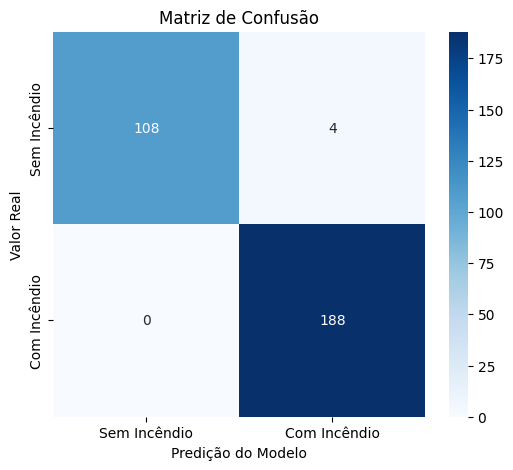

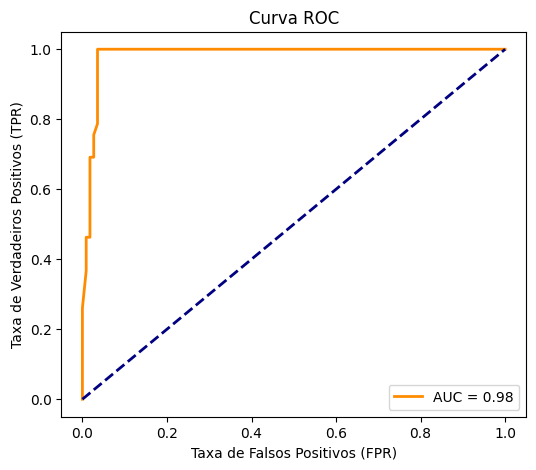

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_prob = grid.decision_function(X_val)  # para SVM

print("\n📊 Relatório no conjunto de validação:\n")
print(classification_report(y_val, y_pred))
print("\nMatriz de confusão:\n")
print(confusion_matrix(y_val, y_pred))
print("Distribuição da classe alvo (treino):")
print(y_train.value_counts())

# Calcular matriz de confusão
cm = confusion_matrix(y_val, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Sem Incêndio", "Com Incêndio"], 
            yticklabels=["Sem Incêndio", "Com Incêndio"])

plt.title("Matriz de Confusão")
plt.ylabel("Valor Real")
plt.xlabel("Predição do Modelo")
plt.show()

from sklearn.metrics import roc_curve, auc

y_prob = grid.decision_function(X_val)  # para SVM
fpr, tpr, _ = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()



